<div class="alert alert-block alert-success">
    <b><center>RECURRENT NEURAL NETWORK</center></b>
    <b><center>RNN 기본 모델들</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)
%matplotlib widget

In [2]:
import os, math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers, backend, utils

# Prepare Data

In [3]:
data = np.array([
    [[1.], [2.], [3.]],
    [[2.], [3.], [4.]],
    [[3.], [4.], [5.]]
])
label = np.array([
    [6.], [7.], [8.]
])
data.shape, label.shape

((3, 3, 1), (3, 1))

# Single-Layered / Unidirectional & Many-To-One

* Input Data : ( batch size, time_step, input_dim(feature size) )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


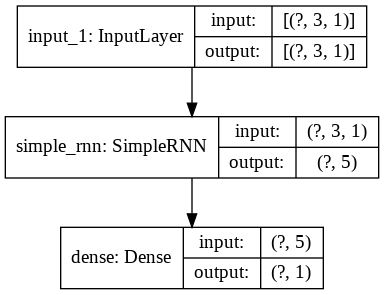

In [4]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [5]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [6]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [7]:
model.predict(data[0:1])

array([[5.977288]], dtype=float32)

In [8]:
model.predict(data)

array([[5.977288],
       [7.155334],
       [7.467791]], dtype=float32)

In [9]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Single-Layered / Unidirectional & Many-To-Many

## return_sequences

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
dense_1 (Dense)              (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


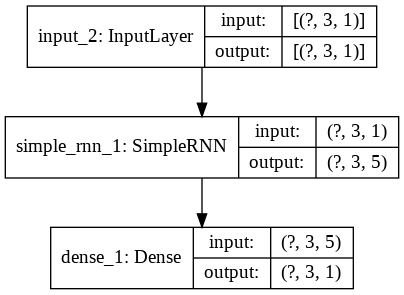

In [10]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [11]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [12]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [13]:
model.predict(data[0:1])

array([[[6.3342514],
        [5.8562765],
        [6.2684813]]], dtype=float32)

In [14]:
model.predict(data)

array([[[6.3342514],
        [5.8562765],
        [6.2684813]],

       [[7.071391 ],
        [6.833498 ],
        [7.182386 ]],

       [[7.233163 ],
        [7.2255154],
        [7.2957034]]], dtype=float32)

In [15]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## TimeDistributed

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


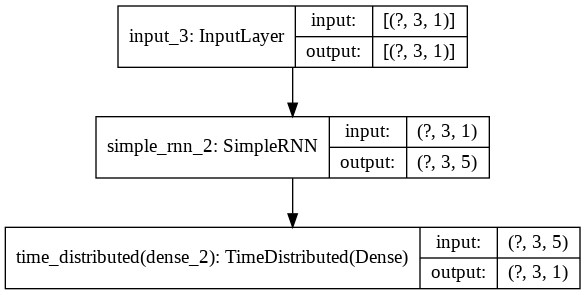

In [16]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [17]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [18]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [19]:
model.predict(data[0:1])

array([[[6.442588 ],
        [6.4098263],
        [6.118957 ]]], dtype=float32)

In [20]:
model.predict(data)

array([[[6.442588 ],
        [6.4098263],
        [6.118957 ]],

       [[7.0779686],
        [6.877558 ],
        [7.170262 ]],

       [[7.34509  ],
        [7.408724 ],
        [7.5556355]]], dtype=float32)

In [21]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Using Backend

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
lambda (Lambda)              (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


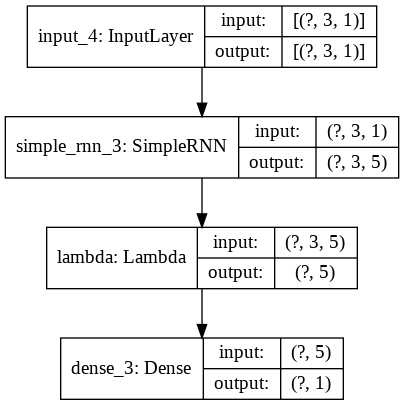

In [22]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: backend.mean(x, axis=1)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [23]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [24]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [25]:
model.predict(data[0:1])

array([[6.138108]], dtype=float32)

In [26]:
model.predict(data)

array([[6.138108],
       [7.021494],
       [7.392302]], dtype=float32)

## Using Lambda Function

In [27]:
@tf.function
def sequences_sum(x):
    return tf.reduce_mean(x, axis=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
lambda_1 (Lambda)            (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


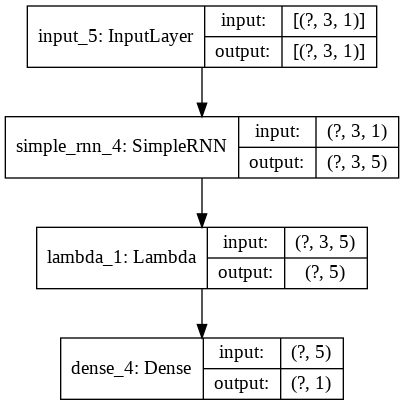

In [28]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences = True),
    layers.Lambda(lambda x: sequences_sum(x)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [29]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [30]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [31]:
model.predict(data[0:1])

array([[5.9399457]], dtype=float32)

In [32]:
model.predict(data)

array([[5.9399457],
       [7.1854434],
       [7.774453 ]], dtype=float32)

# Single-Layered / Bidirectional & Many-To-One

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 10)                70        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


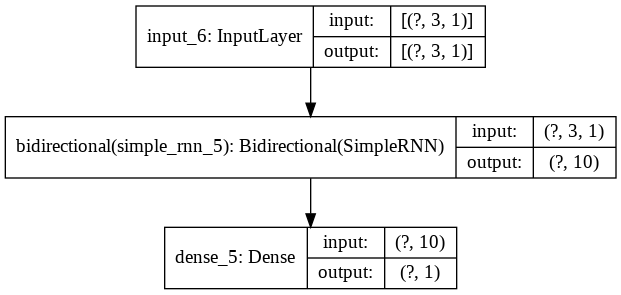

In [33]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [34]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [35]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [36]:
model.predict(data)

array([[6.0041704],
       [7.0114884],
       [7.966937 ]], dtype=float32)

In [37]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Single-Layered / Bidirectional & Many-To-Many

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
time_distributed_1 (TimeDist (None, 3, 1)              11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


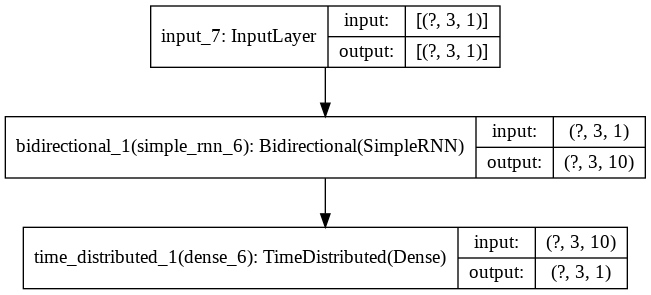

In [38]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [39]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [40]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [41]:
model.predict(data[0:1])

array([[[5.957157 ],
        [5.9412556],
        [5.9058833]]], dtype=float32)

In [42]:
model.predict(data)

array([[[5.957157 ],
        [5.9412556],
        [5.9058833]],

       [[7.2327456],
        [7.072632 ],
        [7.2294817]],

       [[7.7457576],
        [7.8098006],
        [7.8738303]]], dtype=float32)

In [43]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Multi-Layered / Unidirectional & Many-To-One

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


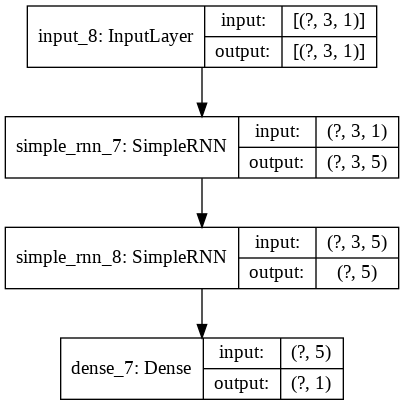

In [44]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.SimpleRNN(5),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [45]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [46]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [47]:
model.predict(data)

array([[6.994655 ],
       [6.9971204],
       [6.998104 ]], dtype=float32)

In [48]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Multi-Layered / Bidirectional & Many-To-One

## Unidirectional > Bidirectional

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 3, 5)              35        
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


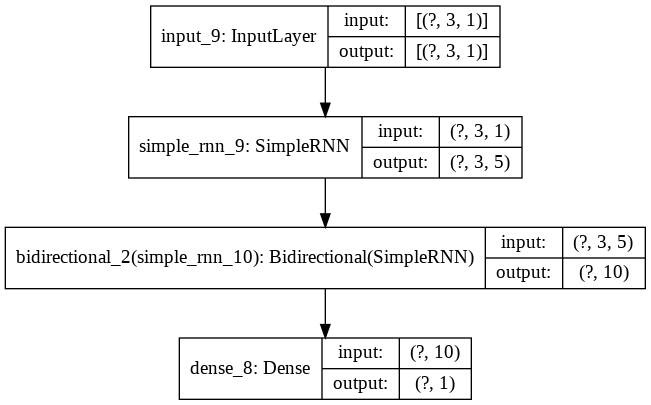

In [49]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5), merge_mode="concat"),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [50]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [51]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [52]:
model.predict(data)

array([[5.998019],
       [7.004035],
       [7.996595]], dtype=float32)

In [53]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Bidirectional > Bidirectional

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


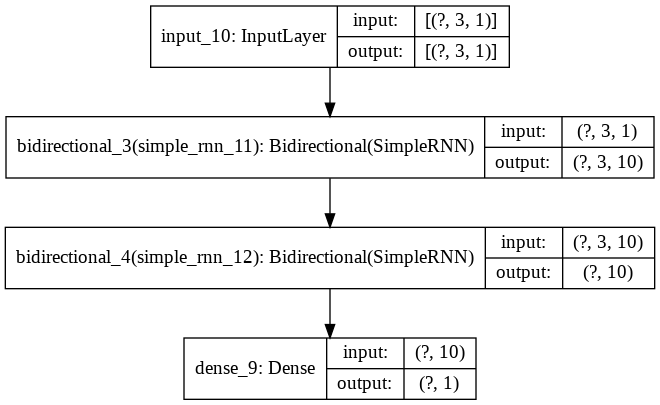

In [54]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5)),
    layers.Dense(1)
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [55]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [56]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [57]:
model.predict(data)

array([[6.000015],
       [7.001006],
       [7.99747 ]], dtype=float32)

In [58]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Multi-Layered / Bidirectional & Many-To-Many

## Unidirectional > Bidirectional

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 3, 5)              35        
_________________________________________________________________
bidirectional_5 (Bidirection (None, 3, 10)             110       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 1)              11        
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


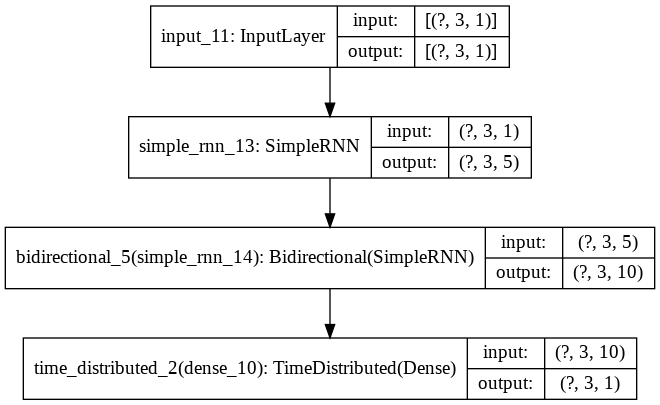

In [59]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.SimpleRNN(5, return_sequences=True),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [60]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [61]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [62]:
model.predict(data)

array([[[5.890316 ],
        [5.944321 ],
        [6.0051665]],

       [[7.4030943],
        [7.1664724],
        [7.054736 ]],

       [[7.8251476],
        [7.805312 ],
        [7.794442 ]]], dtype=float32)

In [63]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Bidirectional > Bidirectional

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 3, 10)             70        
_________________________________________________________________
bidirectional_7 (Bidirection (None, 3, 10)             160       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 1)              11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


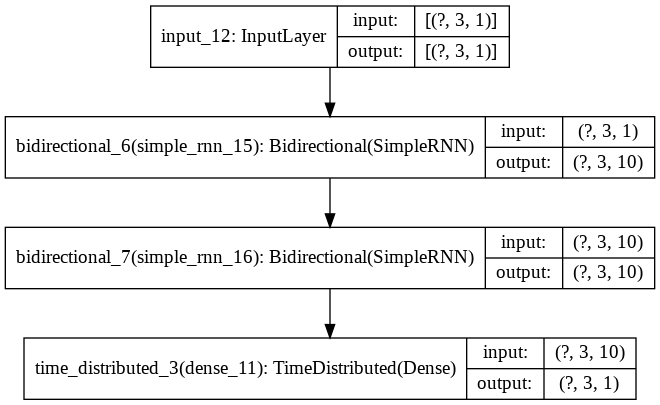

In [64]:
model = models.Sequential([
    layers.Input([3, 1]),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.Bidirectional(layers.SimpleRNN(5, return_sequences=True), merge_mode="concat"),
    layers.TimeDistributed(layers.Dense(1))
])
model.summary()
utils.plot_model(model, to_file="model.png", show_shapes=True)

In [65]:
model.compile(
    loss="mse",
    optimizer="adam"
)

In [66]:
history = model.fit(
    x = data,
    y = label,
    epochs = 1000,
    batch_size = 1,
    verbose = 0
)

In [67]:
model.predict(data)

array([[[5.9315634],
        [5.967567 ],
        [5.935768 ]],

       [[7.15355  ],
        [7.0791516],
        [7.1433   ]],

       [[7.8682556],
        [7.9050584],
        [7.817446 ]]], dtype=float32)

In [68]:
rsp.plotHistory(history)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …